# QRT ENS Data Challenge 2023 - Benchmark (english)

This notebook details the benchmark construction for the challenge - it may also help participants to start the competition.

## Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## Loading data

- `X_train` and `X_test` both have $35$ columns that represent the same explanatory variables but over different time periods. 

- `X_train` and `Y_train` share the same column `ID` - each row corresponds to a unique ID associated wwith a day and a country. 

- The target of this challenge `TARGET` in `Y_train` corresponds to the price change for daily futures contracts of 24H electricity baseload. 

- **You will notice some columns have missing values**.


In [2]:
# After downloading the X_train/X_test/Y_train .csv files in your working directory:

X_train = pd.read_csv('X_train.csv')
Y_train = pd.read_csv('Y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
X_train.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378


In [4]:
Y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


## Model and train score

The benchark for this challenge consists in a simple linear regression, after a light cleaning of the data: The missing (NaN) values are simply filled with 0's and the `COUNTRY` column is dropped - namely we used the same model for France and Germany. 

In [5]:
lr = LinearRegression()

X_train_clean = X_train.drop(['COUNTRY'], axis=1).fillna(0)
Y_train_clean = Y_train['TARGET']

lr.fit(X_train_clean, Y_train_clean)

output_train = lr.predict(X_train_clean)

def metric_train(output):

    return  spearmanr(output, Y_train_clean).correlation

print('Spearman correlation for the train set: {:.1f}%'.format(100 * metric_train(output_train) ))

Spearman correlation for the train set: 27.9%


The Spearman correlation obtained with our model on the train data set is about 27.9%.

NB: Electricity price variations can be quite volatile and this is why we have chosen the Spearman rank correlation as a robust metric for the challenge, instead of the more standard Pearson correlation.
- A coefficient of +1 indicates a perfect positive rank correlation, -1 indicates a perfect negative rank correlation, and 0 indicates no correlation.

## Generate the benchmark output

Next, we process the test set the same way as we did on the train set and predict using our linear model, while saving the predictions to a csv file satisfying the challenge output contraints.


In [6]:
X_test.head()

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1115,241,FR,0.340083,-0.433604,-0.423521,0.423521,0.165333,0.519419,-0.165333,...,-0.222525,-0.513180,-0.182048,-0.982546,-0.876632,0.880491,0.692242,0.569419,-0.029697,-0.929256
1,1202,1214,FR,0.803209,0.780411,0.601610,-0.601610,0.342802,0.555367,-0.342802,...,0.857739,-0.340595,-0.301094,-0.759816,-1.221443,-0.616617,-0.737496,0.251251,0.753646,0.664086
2,1194,1047,FR,0.795540,0.721954,1.179158,-1.179158,1.620928,0.666901,-1.620928,...,0.447967,0.796475,-0.367248,0.376055,-0.483363,0.865138,0.120079,-1.485642,-0.326450,-0.349747
3,1084,1139,FR,0.172555,-0.723427,-0.044539,0.044539,NaN,-0.205276,NaN,...,-0.561295,-0.542606,-0.013291,-0.791119,-0.894309,0.239153,0.457457,-0.746863,2.262654,0.642069
4,1135,842,FR,0.949714,0.420236,0.617391,-0.617391,0.608561,-0.240856,-0.608561,...,0.503567,-0.230291,-0.609203,-0.744986,-1.196282,0.176557,0.312557,-2.219626,-0.509272,-0.488341


In [7]:
X_test_clean = X_test.drop(['COUNTRY'], axis=1).fillna(0)

Y_test_submission = X_test[['ID']].copy()
Y_test_submission['TARGET'] = lr.predict(X_test_clean)

#Ya_test_submission.to_csv('benchmark_qrt.csv', index=False)


After submitting this benchmark_qrt.csv file at https://challengedata.ens.fr, we obtain a public score of around 15.9 % - this is the score to beat!


## Tips and ideas for improvements 

- Thinking about the fundamental price drivers of electricity in each country may be useful. 

- The dataset is small, so you will need to be careful not to overfit your models. It will be useful to use good crossvalidation practices. 


# EDA 

In [8]:
fr_df = X_train[X_train['COUNTRY'] == 'FR']
de_df = X_train[X_train['COUNTRY'] == 'DE']

#make the dataframe descending by DAY_IDX
fr_df = fr_df.sort_values(by='DAY_ID', ascending=True)
de_df = de_df.sort_values(by='DAY_ID', ascending=True)

In [9]:
empty_values = fr_df.isnull().sum()
print(empty_values)

ID                    0
DAY_ID                0
COUNTRY               0
DE_CONSUMPTION        0
FR_CONSUMPTION        0
DE_FR_EXCHANGE       25
FR_DE_EXCHANGE       25
DE_NET_EXPORT       124
FR_NET_EXPORT        70
DE_NET_IMPORT       124
FR_NET_IMPORT        70
DE_GAS                0
FR_GAS                0
DE_COAL               0
FR_COAL               0
DE_HYDRO              0
FR_HYDRO              0
DE_NUCLEAR            0
FR_NUCLEAR            0
DE_SOLAR              0
FR_SOLAR              0
DE_WINDPOW            0
FR_WINDPOW            0
DE_LIGNITE            0
DE_RESIDUAL_LOAD      0
FR_RESIDUAL_LOAD      0
DE_RAIN              47
FR_RAIN              47
DE_WIND              47
FR_WIND              47
DE_TEMP              47
FR_TEMP              47
GAS_RET               0
COAL_RET              0
CARBON_RET            0
dtype: int64


In [10]:
fr_df = fr_df.fillna(0)
de_df = de_df.fillna(0)

In [11]:
# for column in fr_df.columns[10]:
#     plt.figure(figsize=(45, 10))  
#     plt.plot(fr_df['DAY_ID'], fr_df[column], label='France')
#     plt.plot(de_df['DAY_ID'], de_df[column], label='Germany')

#     plt.xlabel('day_ID')
#     plt.ylabel(column)
#     plt.legend()
#     plt.show()

Views from the plot:
- FR/DE_IMPORT = - FR/DE_EXPORT
- DE_FR_EXCHANGE = - FR_DE_EXCHANGE



# Correlation 

In [12]:
fr_df_combined = fr_df.merge(Y_train, on='ID')
de_df_combined = de_df.merge(Y_train, on='ID')

/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_80049/173337185.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_fr = fr_df_combined.corr()
/var/folders/dp/4_t_qbl93db5chwk2q5m91540000gn/T/ipykernel_80049/173337185.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_de = de_df_combined.corr()


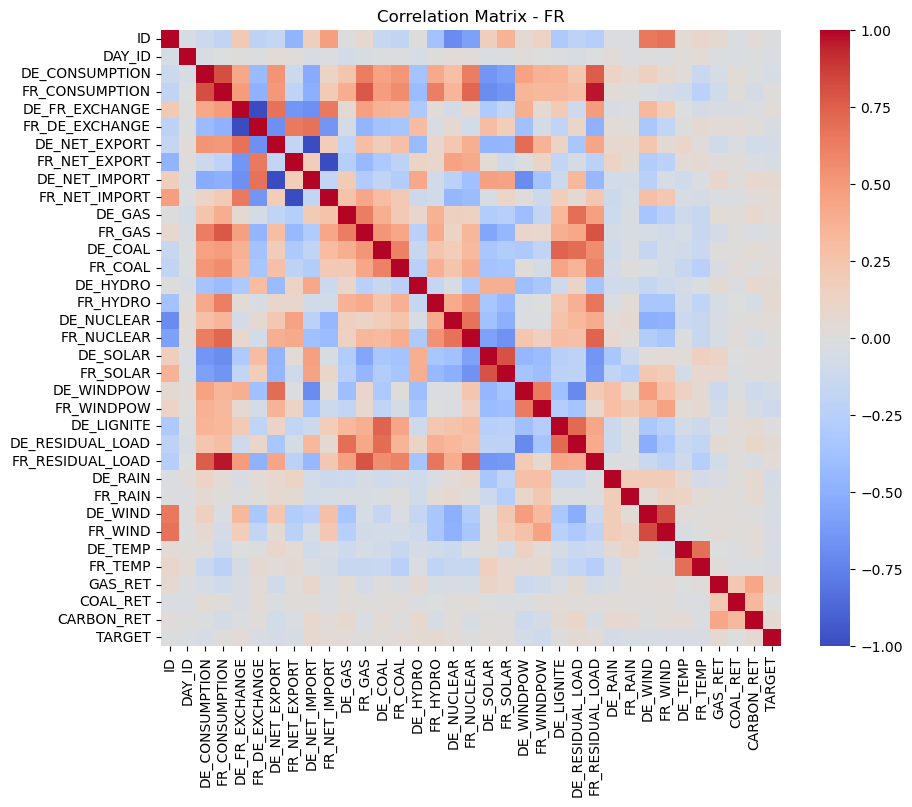

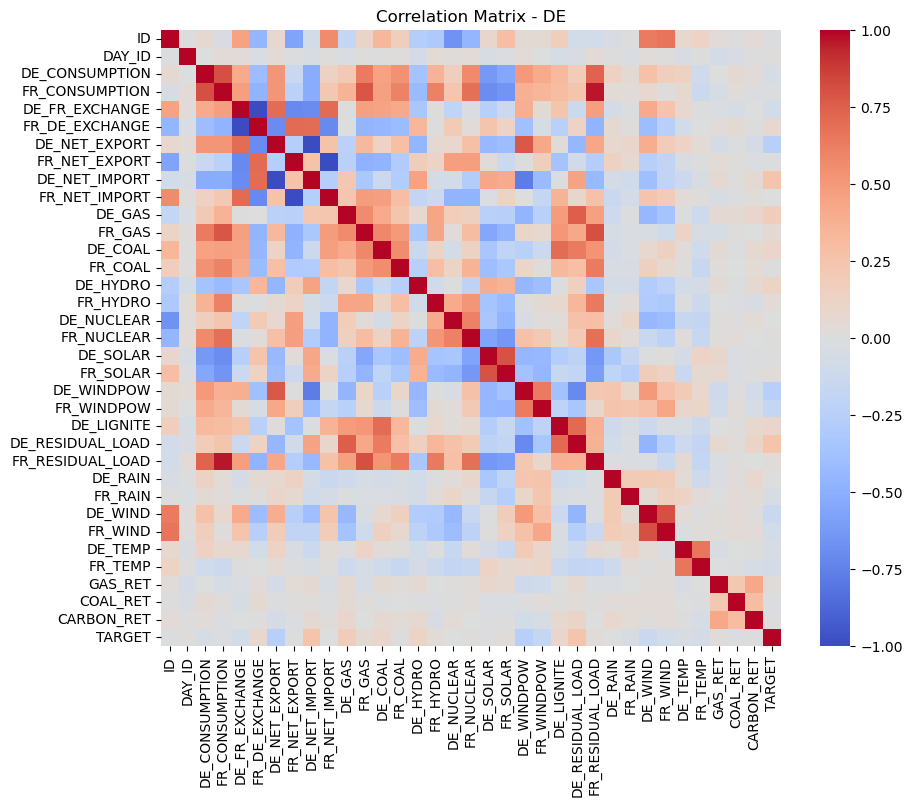

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_fr = fr_df_combined.corr()
correlation_de = de_df_combined.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_fr, cmap='coolwarm')
plt.title('Correlation Matrix - FR')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_de, cmap='coolwarm')
plt.title('Correlation Matrix - DE')
plt.show()


In [14]:
print("FR Correlation:\n",correlation_fr['TARGET'].sort_values(ascending=False).drop('TARGET').tail(10))


FR Correlation:
 FR_DE_EXCHANGE   -0.035013
FR_RAIN          -0.039784
FR_NET_EXPORT    -0.042447
DE_TEMP          -0.042796
DE_WIND          -0.045314
DE_CONSUMPTION   -0.048551
DE_RAIN          -0.066111
DE_NET_EXPORT    -0.066347
DE_WINDPOW       -0.073254
FR_WINDPOW       -0.107403
Name: TARGET, dtype: float64


In [15]:
print("DE Correlation:\n",correlation_de['TARGET'].sort_values(ascending=False).drop('TARGET').head(10))

DE Correlation:
 DE_RESIDUAL_LOAD    0.250898
DE_NET_IMPORT       0.250616
DE_GAS              0.177561
DE_HYDRO            0.123676
DE_COAL             0.097803
DE_LIGNITE          0.095619
FR_DE_EXCHANGE      0.084194
FR_GAS              0.048483
FR_HYDRO            0.038172
FR_RESIDUAL_LOAD    0.029686
Name: TARGET, dtype: float64


ahey